# **Deep Learning Term Project CS60010 Spring Semester 2024**
# **Task: Build encoder decoder models for Automatic Image Captioning**
# **Group ID: G-07**
# **Group Name: Optimus**

## **Group description**
### **1. Saurabh Rajesh Mishra 23CS60R51**
### **2. Krushil Pragneshbhai Patel 23CS60R24**
### **3. Susmit Rajendra Shegokar 23CS60R74**
### **4. Gopal Atubhai Bhammar 23CS60R35**

## **Methodology: Image Captioning Model**

**1. EncoderCNN:**
   - **Description:** The EncoderCNN class utilizes the Inception v3 pre-trained model for feature extraction from images. It replaces the final fully connected layer of Inception v3 with a new linear layer to output features of a specified size (embed_size).
   - **Explanation:**
     - The Inception v3 model is a deep convolutional neural network (CNN) pre-trained on the ImageNet dataset. It is known for its effectiveness in image classification tasks.
     - In the EncoderCNN class, we initialize the Inception v3 model with pretrained weights and set aux_logits=True to include auxiliary logits in the output.
     - We replace the final fully connected layer of Inception v3 (inception.fc) with a new linear layer to adjust the output size to the desired embed_size for feature representation.
     - Additionally, a ReLU activation function and dropout layer (dropout=0.5) are applied to the output features for non-linearity and regularization.

   - **Diagram:**
    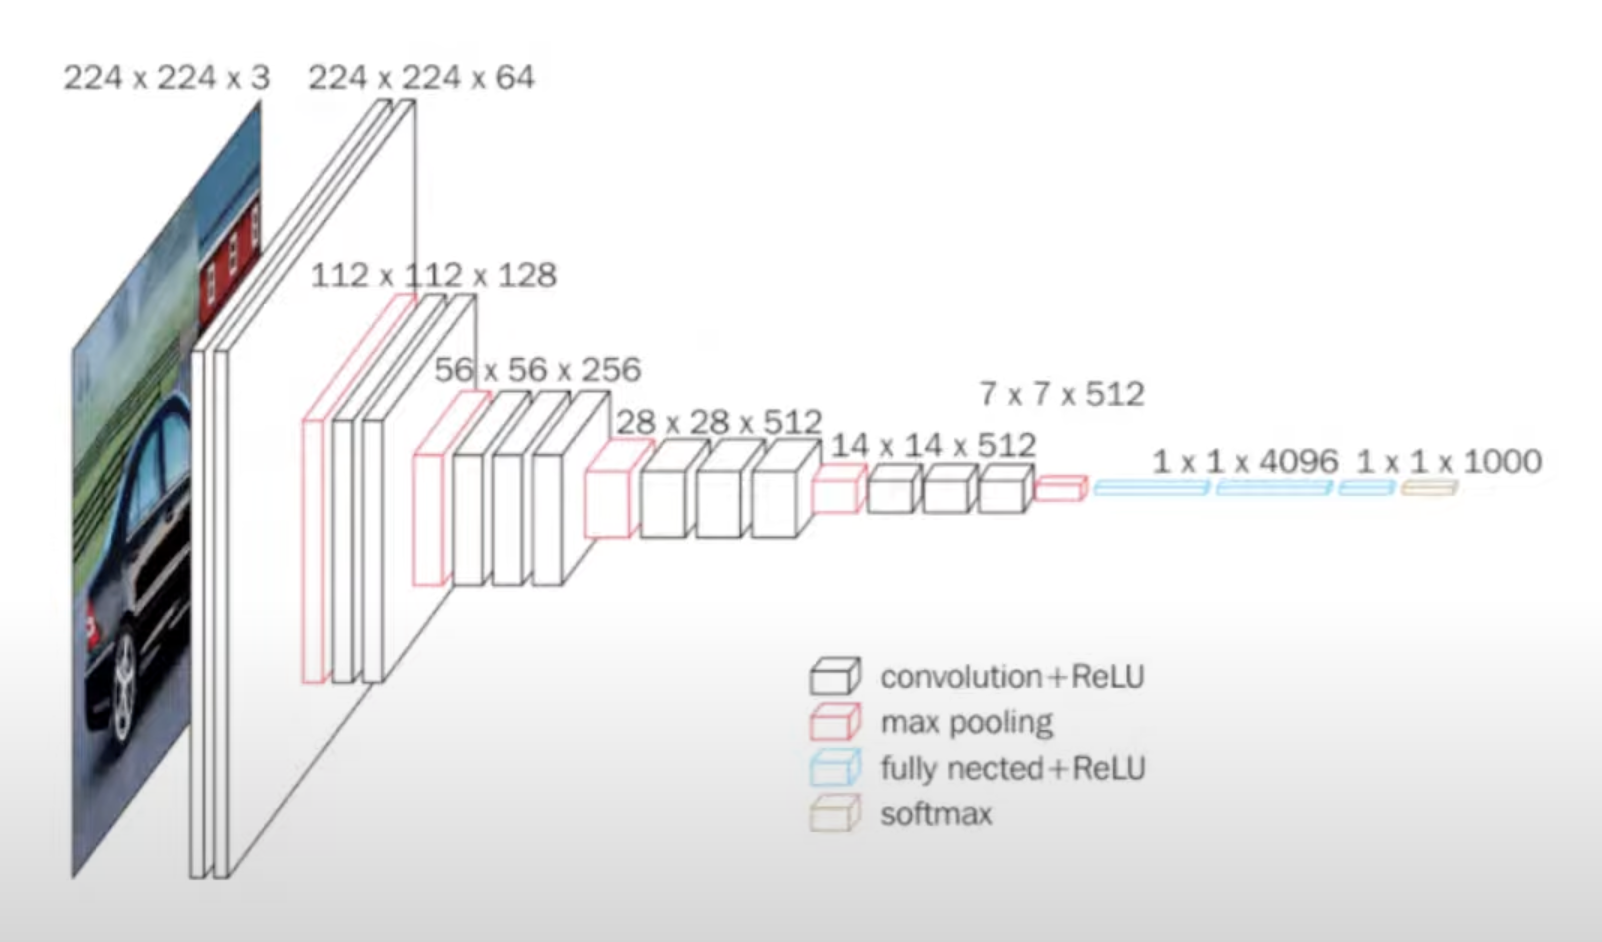

**2. DecoderRNN:**
   - **Description:** The DecoderRNN class implements an LSTM-based decoder for generating captions based on image features obtained from the EncoderCNN.
   - **Explanation:**
     - The DecoderRNN class consists of an embedding layer (nn.Embedding), an LSTM layer (nn.LSTM), and a linear layer (nn.Linear) for generating captions.
     - The embedding layer converts words into dense vectors of embed_size dimensions.
     - The LSTM layer takes the embedded words and image features as inputs, and outputs hidden states that capture the sequential context.
     - Finally, the linear layer predicts the next word in the caption based on the hidden states from the LSTM.
     - A dropout layer (dropout=0.5) is applied to the embeddings for regularization.

   - **Diagram:**
    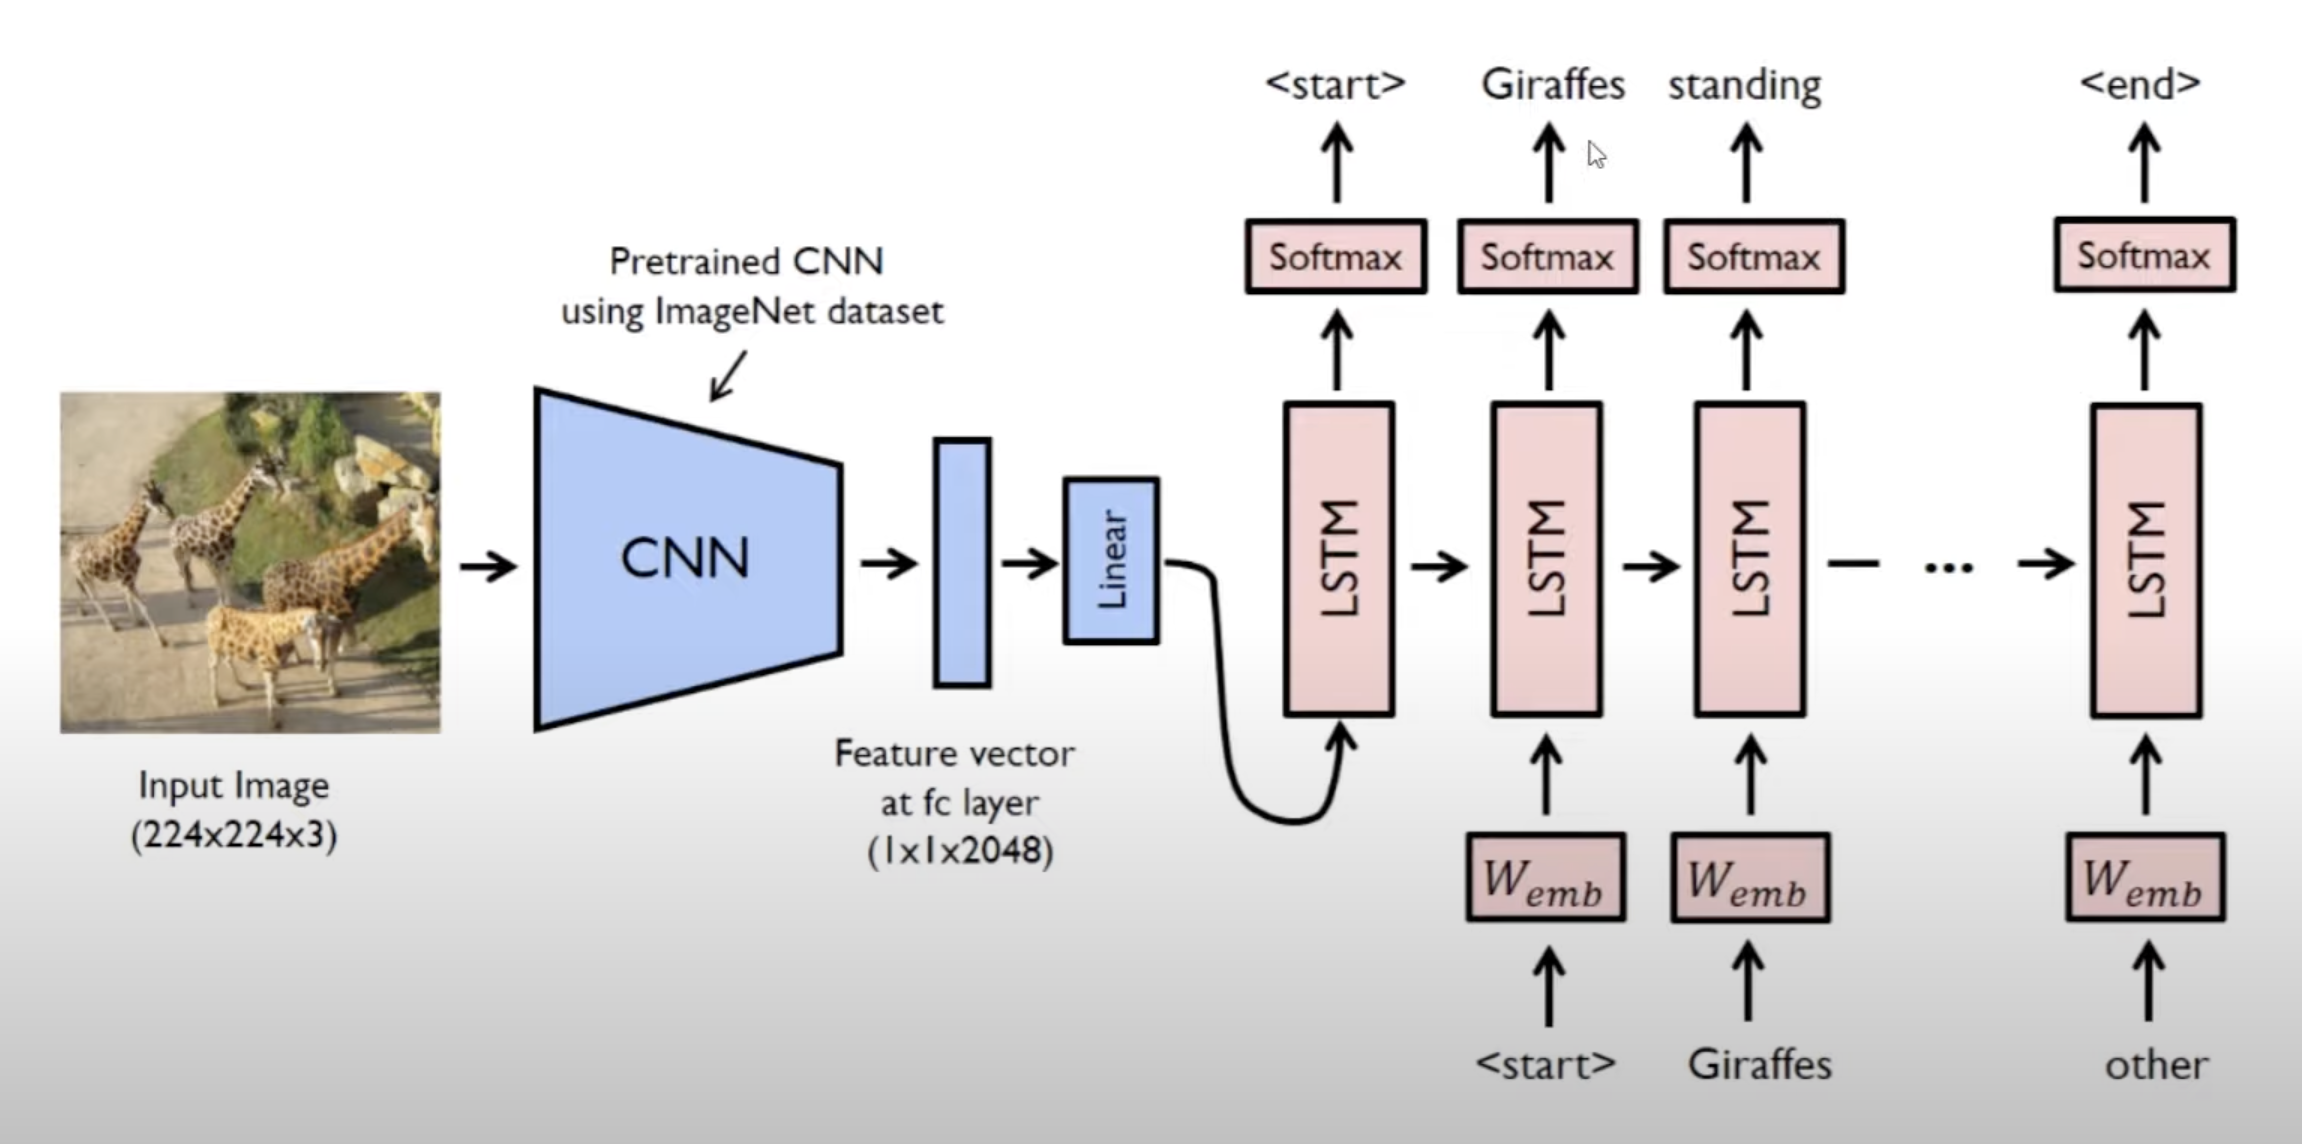

**3. CNNtoRNN (Overall Model):**
   - **Description:** The CNNtoRNN class integrates the EncoderCNN and DecoderRNN into a single model for end-to-end image captioning.
   - **Explanation:**
     - The CNNtoRNN class combines the functionality of the EncoderCNN and DecoderRNN to create an end-to-end image captioning model.
     - It takes images as input, extracts features using the EncoderCNN, and generates captions using the DecoderRNN based on the extracted features.
     - During training, the model learns to map images to their corresponding captions using the encoder-decoder architecture.
     - During inference, the model predicts captions for new images by leveraging the learned parameters.

### **Installing necessary libraries**

This script imports necessary libraries and sets up the environment for image captioning using PyTorch. It includes loading images, tokenization using SpaCy, defining a dataset class for handling image-caption pairs, setting up a DataLoader for batching and padding sequences, creating a neural network architecture for caption generation, training the model with optimization, and using evaluation metrics such as BLEU, CIDEr, and ROUGE for assessing the generated captions' quality.

In [ ]:
import pandas as pd
from PIL import Image
import random
import matplotlib.pyplot as plt
import os  # when loading file paths
import pandas as pd  # for lookup in annotation file
import spacy  # for tokenizer
import torch
from torch.nn.utils.rnn import pad_sequence  # pad batch
from torch.utils.data import DataLoader, Dataset
from PIL import Image  # Load img
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import statistics
import torchvision.models as models
import torch
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
import random
import pandas as pd
import matplotlib.pyplot as plt
import evaluate
from cidereval import cider

### **Loading Training and Testing Data for Custom Captions Dataset**

This code segment imports the Pandas library and reads two CSV files, "train.csv" and "test.csv," from the "custom_captions_dataset" directory. These CSV files likely contain data such as image paths and corresponding captions, which are commonly used for training and testing custom captioning models in machine learning or deep learning applications.

In [ ]:
import pandas as pd
train_df =  pd.read_csv("custom_captions_dataset/train.csv")
test_df =  pd.read_csv("custom_captions_dataset/test.csv")

### **Dataset Loading Functions for Custom Image Captioning**

This code defines functions to load a dataset for custom image captioning tasks. The `load_dataset` function organizes image paths and captions from a given DataFrame into a structured format, while the `load_image` function handles the loading and conversion of images to RGB format. These functions are essential for preparing data for training custom captioning models in machine learning or deep learning applications.

In [ ]:
from PIL import Image
# Load dataset
def load_dataset(dataframe):
    dataset = {
        'test': {
            'caption': dataframe['caption'].tolist(),
            'image': [f"custom_captions_dataset/train/{filename}" for filename in dataframe['filename']]
        }
    }
    return dataset

# Load image from filepath
def load_image(filepath):
    with Image.open(filepath) as img:
        return img.convert("RGB")

dataset = load_dataset(train_df)

### **Displaying Random Image with Caption**

This function displays a random image and its corresponding caption from a given dataset. Here's how it works:

1. **Inputs:**
   - `dataset`: The dataset containing image paths and captions.
   - `image_size`: The size of the displayed image (default is 25x25 inches).
   - `caption_size`: The font size of the caption text (default is 40).

2. **Process:**
   - Generates a random index within the range of images in the dataset using `random.randint(0, len(dataset['test']['image']) - 1)`.
   - Retrieves the image path and caption corresponding to the random index.
   - Loads the image using the `load_image` function.
   - Splits the caption into lines after each full stop ('.').
   - Prepares the caption text for display by joining the lines with newline characters ('\n').

3. **Display:**
   - Creates a figure with an adjustable size based on `image_size`.
   - Displays the image using `plt.imshow(img)` and removes the axis using `plt.axis('off')`.
   - Sets the size of the figure using `plt.gcf().set_size_inches(*image_size)`.
   - Displays the caption text below the image with an adjustable font size (`caption_size`) and alignment using `plt.text`.
   - Adjusts the layout to ensure proper spacing using `plt.tight_layout()`.
   - Shows the image and caption using `plt.show()`.

This function is useful for visualizing random images from a dataset along with their captions, providing a quick way to inspect the data and understand the content associated with each image.

In [ ]:
import random
import matplotlib.pyplot as plt

# Function to display a random image and its caption with adjustable size
def display_random_image(dataset, image_size=(25, 25), caption_size=40):
    plt.figure(figsize=(25, 25))  # Adjusted figure size
    random_index = random.randint(0, len(dataset['test']['image']) - 1)
    image_path = dataset['test']['image'][random_index]
    caption = dataset['test']['caption'][random_index]
    img = load_image(image_path)

    # Display image
    plt.imshow(img)
    plt.axis('off')
    plt.gcf().set_size_inches(*image_size)  # Adjustable image size

    # Split caption into lines after each full stop
    lines = []
    line = ""
    for char in caption:
        line += char
        if char == '.':
            lines.append(line)
            line = ""

    caption_display = '\n'.join(lines)

    plt.text(0.5, -0.1, caption_display, fontsize=caption_size, ha='center', va='top', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()

### Displaying **sample images and their captions**

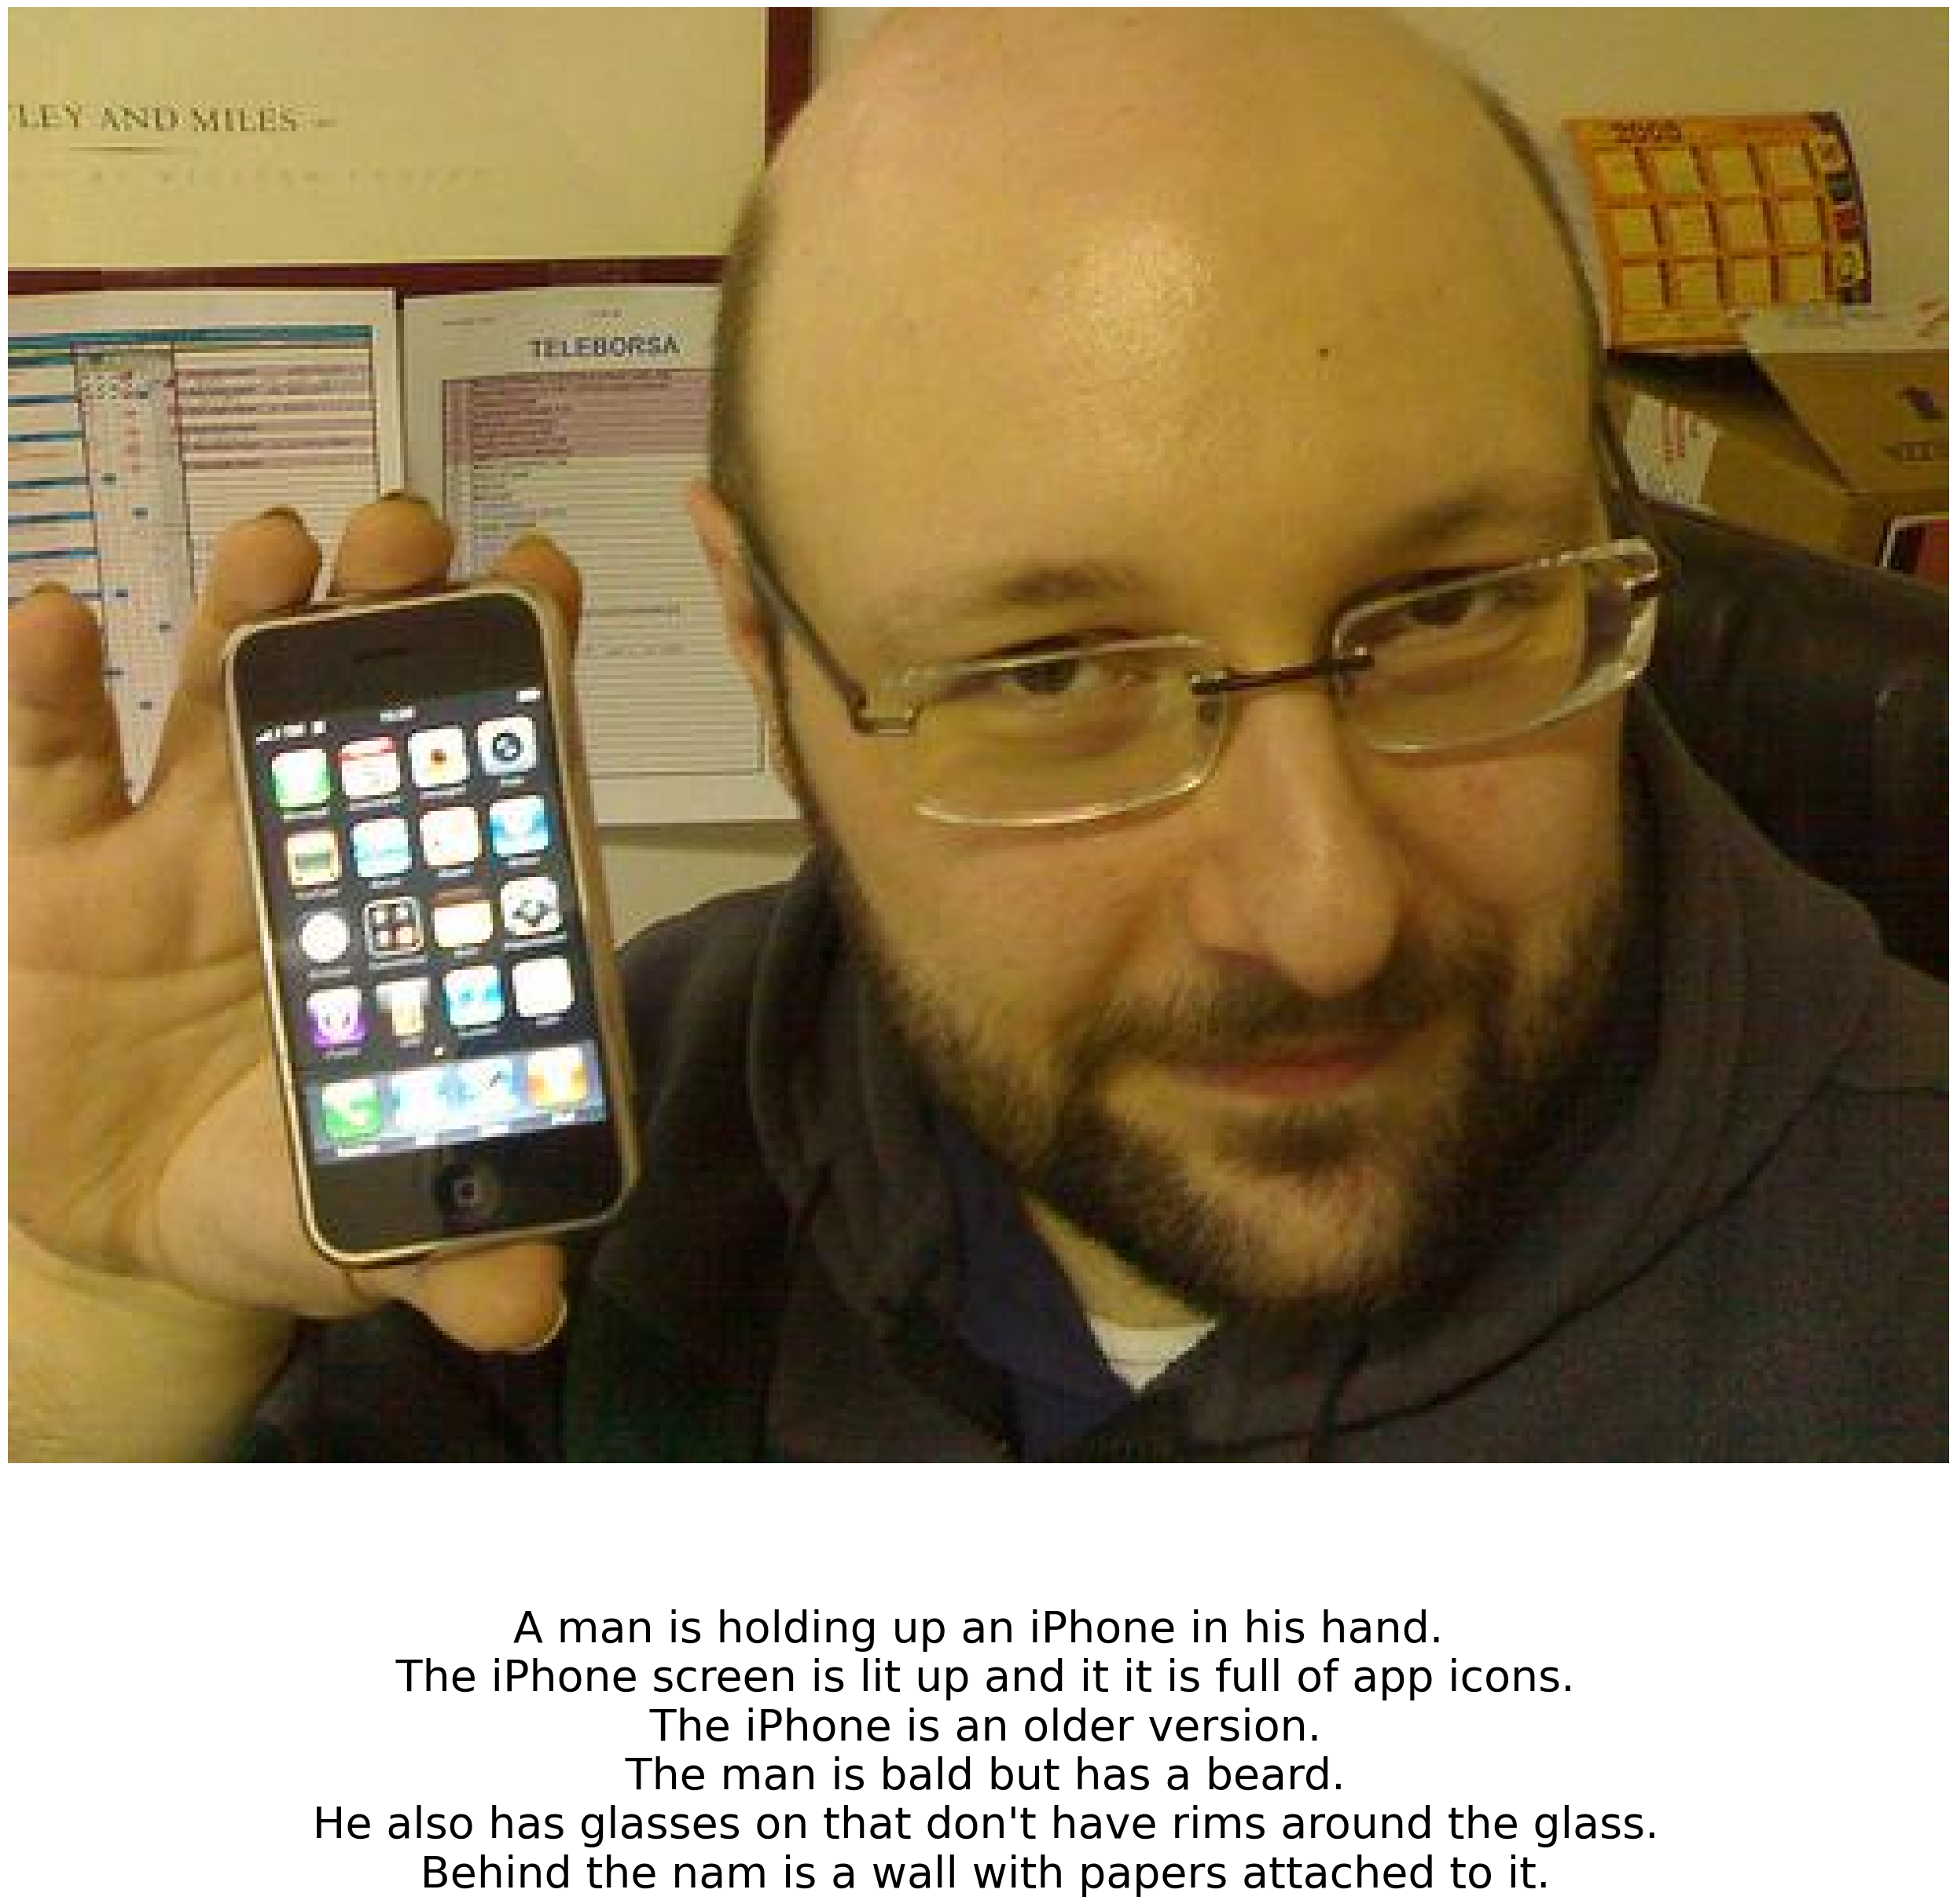

In [ ]:
# Display a random image and its caption with adjustable size
display_random_image(dataset, image_size=(25, 25), caption_size=40)

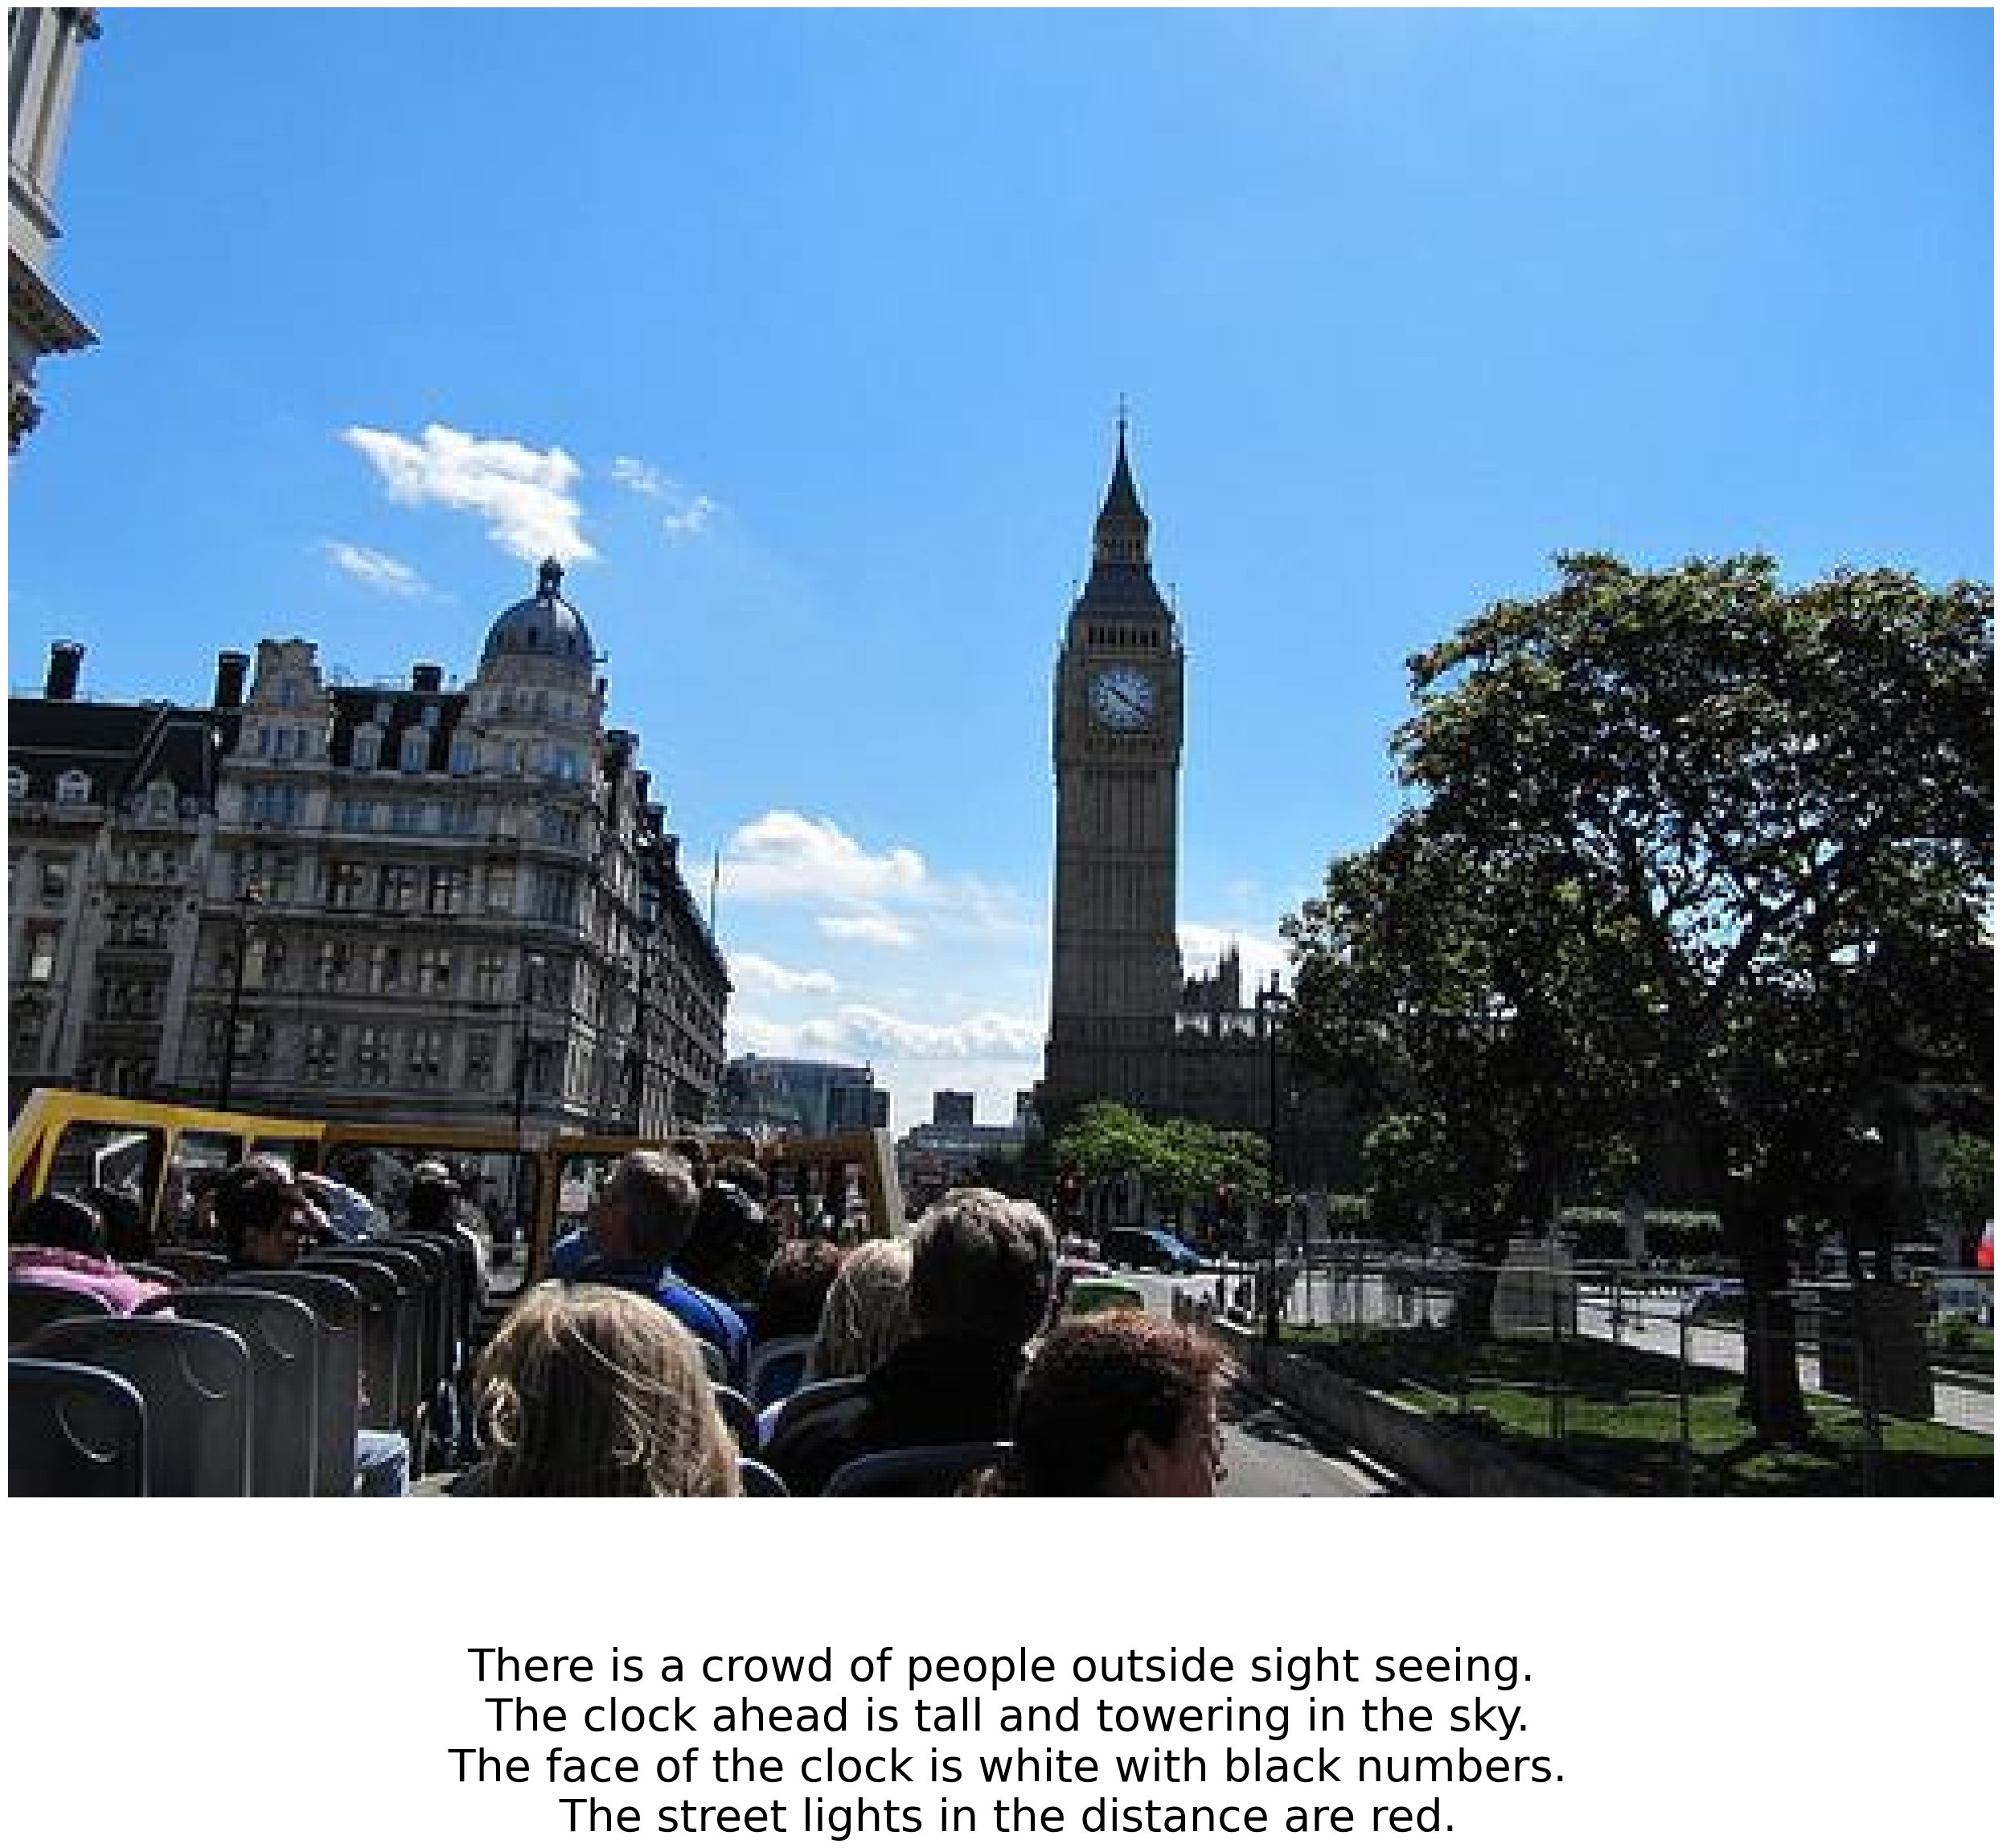

In [ ]:
# Display a random image and its caption with adjustable size
display_random_image(dataset, image_size=(25, 25), caption_size=40)

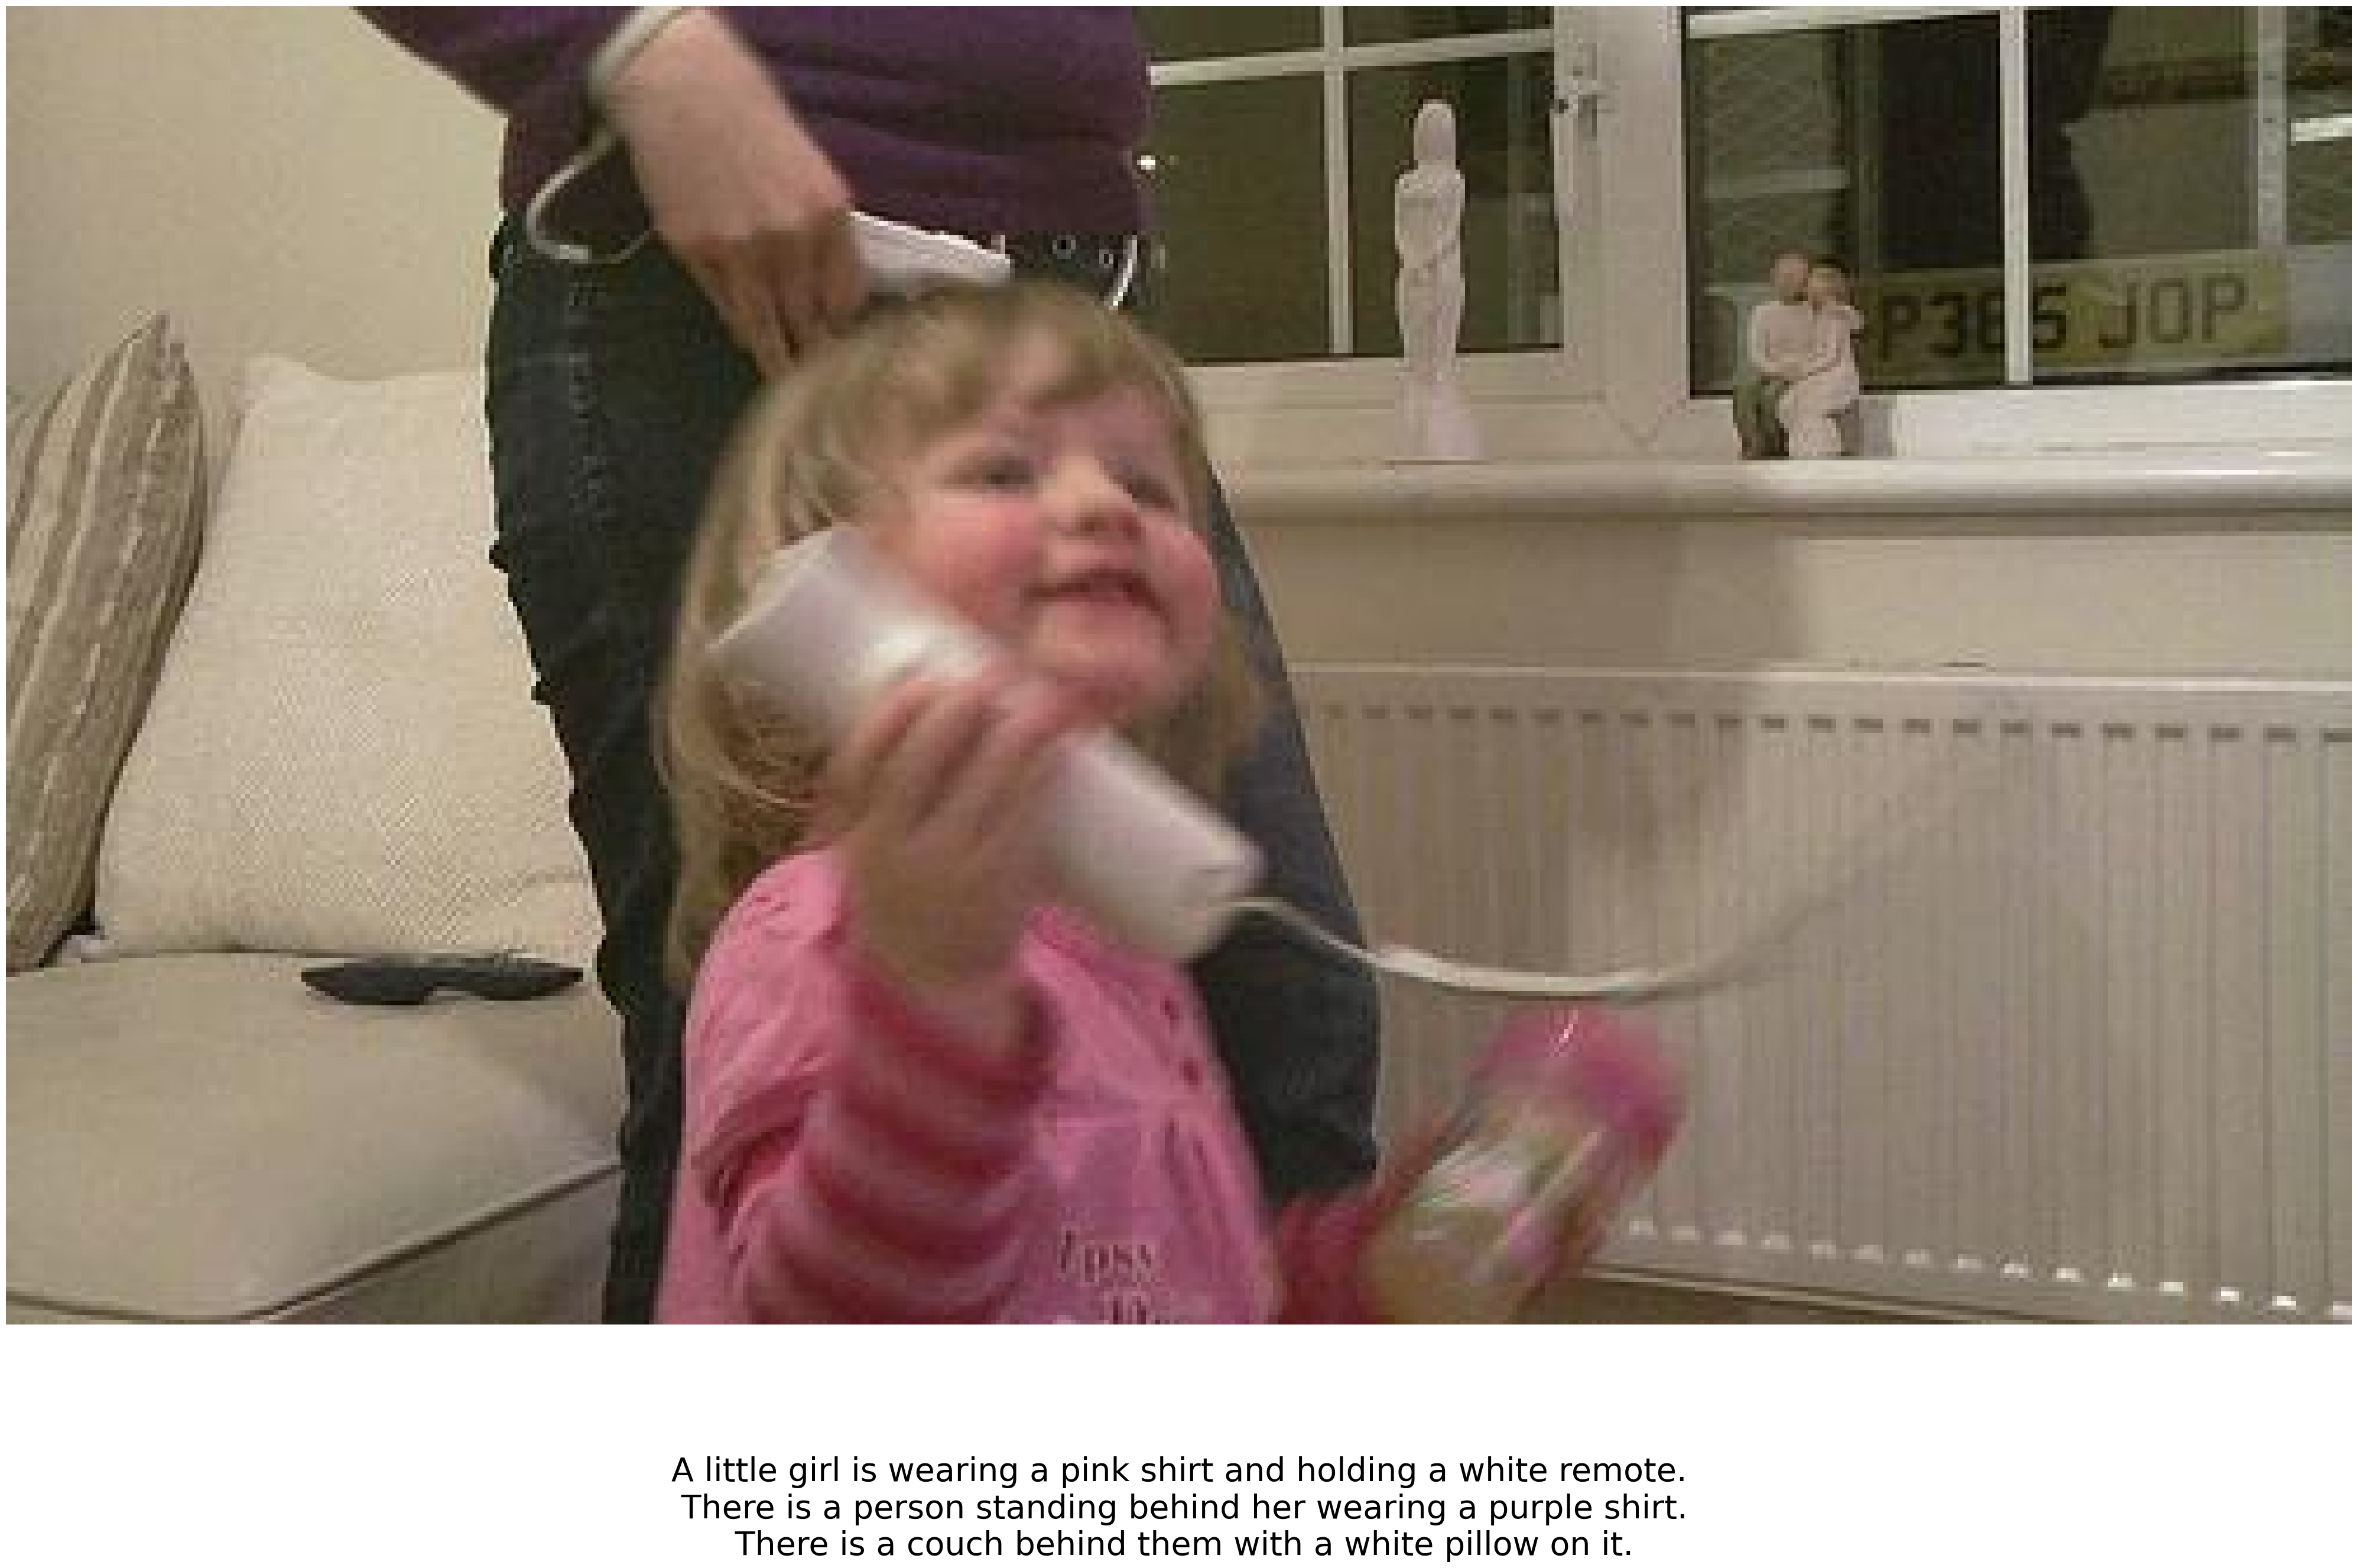

In [ ]:
# Display a random image and its caption with adjustable size
display_random_image(dataset, image_size=(40, 40), caption_size=40)

**Title: "Custom Dataset and DataLoader Setup for Image Captioning in PyTorch"**

This code snippet sets up a custom dataset and data loader for image captioning tasks using PyTorch. It includes classes and functions for handling vocabulary creation, data loading, transformation, and batching. Here's a breakdown of the components:

1. **Vocabulary Class:**
   - Handles tokenization of captions and builds a vocabulary based on word frequencies.
   - Converts captions into numericalized form for model processing.

2. **FlickrDataset Class:**
   - Inherits from PyTorch Dataset and loads images and captions from CSV files.
   - Uses the Vocabulary class to numericalize captions.
   - Optionally applies transformations to images, such as resizing and converting to tensors.

3. **MyCollate Class:**
   - Custom collate function for the DataLoader.
   - Pads sequences to ensure uniform input sizes for the model during training.

4. **get_loader Function:**
   - Creates a DataLoader object with specified parameters for batch processing.
   - Utilizes the custom dataset and collate function to handle data loading efficiently.

This setup is designed to streamline the process of preparing image-caption data for training image captioning models within the PyTorch framework.

In [ ]:
import os  # when loading file paths
import pandas as pd  # for lookup in annotation file
import spacy  # for tokenizer
import torch
from torch.nn.utils.rnn import pad_sequence  # pad batch
from torch.utils.data import DataLoader, Dataset
from PIL import Image  # Load img
import torchvision.transforms as transforms

spacy_eng = spacy.load("en_core_web_lg")

class Vocabulary:
    def __init__(self, freq_threshold):
        self.itos = {0: "<PAD>", 1: "<SOS>", 2: "<EOS>", 3: "<UNK>"}
        self.stoi = {"<PAD>": 0, "<SOS>": 1, "<EOS>": 2, "<UNK>": 3}
        self.freq_threshold = freq_threshold

    def __len__(self):
        return len(self.itos)

    @staticmethod
    def tokenizer_eng(text):
        # nlp =spacy.cli.download("en_core_web_sm")
        return [tok.lower() for tok in text.split(" ")]

    def build_vocabulary(self, sentence_list):
        frequencies = {}
        idx = 4

        for sentence in sentence_list:
            for word in self.tokenizer_eng(sentence):
                # print(word)
                if word not in frequencies:
                    frequencies[word] = 1

                else:
                    frequencies[word] += 1

                if frequencies[word] == self.freq_threshold:
                    self.stoi[word] = idx
                    self.itos[idx] = word
                    idx += 1

    def numericalize(self, text):
        tokenized_text = self.tokenizer_eng(text)

        return [
            self.stoi[token] if token in self.stoi else self.stoi["<UNK>"]
            for token in tokenized_text
        ]

class FlickrDataset(Dataset):
    def __init__(self, root_dir, captions_file, transform=None, freq_threshold=5):
        self.root_dir = root_dir
        self.df = pd.read_csv(captions_file)
        self.transform = transform

        # Get img, caption columns
        self.imgs = self.df["filename"]
        self.captions = self.df["caption"]

        # Initialize vocabulary and build vocab
        self.vocab = Vocabulary(freq_threshold)
        self.vocab.build_vocabulary(self.captions.tolist())

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        caption = self.captions[index]
        img_id = self.imgs[index]
        img = Image.open(os.path.join(self.root_dir, img_id)).convert("RGB")

        if self.transform is not None:
            img = self.transform(img)

        numericalized_caption = [self.vocab.stoi["<SOS>"]]
        numericalized_caption += self.vocab.numericalize(caption)
        numericalized_caption.append(self.vocab.stoi["<EOS>"])

        return img, torch.tensor(numericalized_caption)


class MyCollate:
    def __init__(self, pad_idx):
        self.pad_idx = pad_idx

    def __call__(self, batch):
        imgs = [item[0].unsqueeze(0) for item in batch]
        imgs = torch.cat(imgs, dim=0)
        targets = [item[1] for item in batch]
        targets = pad_sequence(targets, batch_first=False, padding_value=self.pad_idx)

        return imgs, targets


def get_loader(
    root_folder,
    annotation_file,
    transform,
    batch_size=32,
    num_workers=8,
    shuffle=True,
    pin_memory=True,
):
    dataset = FlickrDataset(root_folder, annotation_file, transform=transform)

    pad_idx = dataset.vocab.stoi["<PAD>"]

    loader = DataLoader(
        dataset=dataset,
        batch_size=batch_size,
        num_workers=num_workers,
        shuffle=shuffle,
        pin_memory=pin_memory,
        collate_fn=MyCollate(pad_idx=pad_idx),
    )

    return loader, dataset

transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(),])

loader, dataset = get_loader("custom_captions_dataset/train", "custom_captions_dataset/train.csv", transform=transform)

### **Image Captioning Model with Encoder-Decoder Architecture in PyTorch**

This code defines a complete image captioning model with an encoder-decoder architecture in PyTorch. Here's an explanation of each component:

1. **EncoderCNN Class:**
   - Uses Inception v3 pre-trained on ImageNet to extract image features.
   - Replaces the final fully connected layer to output features of a specified size (`embed_size`).

2. **DecoderRNN Class:**
   - Implements an RNN decoder for generating captions.
   - Uses an embedding layer to convert words into vectors.
   - Includes an LSTM layer for sequence modeling and a linear layer to predict the next word in the caption.

3. **CNNtoRNN Class:**
   - Combines the encoder and decoder networks into a single model.
   - Takes images and captions as input.
   - Passes images through the encoder to extract features.
   - Feeds features and captions into the decoder to generate captions.

4. **caption_image Method:**
   - Generates captions for input images using the trained model and a provided vocabulary.
   - Uses the decoder's LSTM and linear layers to predict words sequentially until the "<EOS>" token is encountered.

This architecture forms the basis of an image captioning system where the encoder extracts image features, and the decoder generates captions based on these features and input captions.

In [ ]:
import torch
import torch.nn as nn
import statistics
import torchvision.models as models


class EncoderCNN(nn.Module):
    def __init__(self, embed_size, train_CNN=False):
        super(EncoderCNN, self).__init__()
        self.train_CNN = train_CNN
        self.inception = models.inception_v3(pretrained=True, aux_logits=True)
        self.inception.fc = nn.Linear(self.inception.fc.in_features, embed_size)
        self.relu = nn.ReLU()
        self.times = []
        self.dropout = nn.Dropout(0.5)

    def forward(self, images):
        features,abc = self.inception(images)
        return features

class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers):
        super(DecoderRNN, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers)
        self.linear = nn.Linear(hidden_size, vocab_size)
        self.dropout = nn.Dropout(0.5)

    def forward(self, features, captions):
        embeddings = self.dropout(self.embed(captions))
        embeddings = torch.cat((features.unsqueeze(0), embeddings), dim=0)
        hiddens, _ = self.lstm(embeddings)
        outputs = self.linear(hiddens)
        return outputs



class CNNtoRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers):
        super(CNNtoRNN, self).__init__()
        self.encoderCNN = EncoderCNN(embed_size)
        self.decoderRNN = DecoderRNN(embed_size, hidden_size, vocab_size, num_layers)

    def forward(self, images, captions):
        features = self.encoderCNN(images)
        outputs = self.decoderRNN(features, captions)
        return outputs

    def caption_image(self, image, vocabulary, max_length=50):
        result_caption = []

        with torch.no_grad():
            x = self.encoderCNN(image).unsqueeze(0)
            states = None

            for _ in range(max_length):
                hiddens, states = self.decoderRNN.lstm(x, states)
                output = self.decoderRNN.linear(hiddens.squeeze(0))
                predicted = output.argmax(1)
                result_caption.append(predicted.item())
                x = self.decoderRNN.embed(predicted).unsqueeze(0)

                if vocabulary.itos[predicted.item()] == "<EOS>":
                    break

        return [vocabulary.itos[idx] for idx in result_caption]

### **Training Loop for Image Captioning Model in PyTorch**

This script implements a training loop for an image captioning model using PyTorch. Here's an explanation of its key components:

1. **Data Preparation:**
   - Defines transformations for image preprocessing, such as resizing, cropping, and normalization.
   - Loads the training data using `get_loader` with specified transformations.

2. **Model Setup:**
   - Initializes the image captioning model with hyperparameters like embedding size, hidden size, vocabulary size, etc.
   - Sets up the loss function (CrossEntropyLoss) and optimizer (Adam).

3. **Training Loop:**
   - Sets the model to training mode and iterates over epochs.
   - Loads batches of images and captions from the data loader.
   - Computes forward pass, loss, and performs backpropagation for parameter updates.

4. **Tensorboard Logging:**
   - Utilizes SummaryWriter from torch.utils.tensorboard to log training loss for visualization in Tensorboard.
   - Increments the global step for each training iteration.

5. **Device Handling:**
   - Checks for CUDA availability and sets the device accordingly (GPU or CPU).

6. **Model Saving:**
   - Optionally saves the model state after each epoch using torch.save.

This script serves as a comprehensive guide for training an image captioning model from data loading to model optimization, with support for GPU acceleration and training monitoring using Tensorboard.

In [ ]:
import torch
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

def train():
    transform = transforms.Compose(
        [
            transforms.Resize((356, 356)),
            transforms.RandomCrop((299, 299)),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ]
    )

    train_loader, dataset = get_loader(
        root_folder="custom_captions_dataset/train",
        annotation_file="custom_captions_dataset/train.csv",
        transform=transform,
        num_workers=2,
    )

    torch.backends.cudnn.benchmark = True

    load_model = False
    save_model = False
    train_CNN = False

    # Hyperparameters
    embed_size = 512 #256
    hidden_size = 512 #256
    vocab_size = len(dataset.vocab)
    num_layers = 1
    learning_rate = 3e-4
    num_epochs = 500 #300

    # for tensorboard
    writer = SummaryWriter("runs/flickr")
    step = 0

    # initialize model, loss etc
    model = CNNtoRNN(embed_size, hidden_size, vocab_size, num_layers).to(device)
    criterion = nn.CrossEntropyLoss(ignore_index=dataset.vocab.stoi["<PAD>"])
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Only finetune the CNN
    for name, param in model.encoderCNN.inception.named_parameters():
        if "fc.weight" in name or "fc.bias" in name:
            param.requires_grad = True
        else:
            param.requires_grad = train_CNN

    model.train()

    for epoch in range(num_epochs):
        # Uncomment the line below to see a couple of test cases
        # print_examples(model, device, dataset)

        torch.save(model, 'mtp.pth')

        for idx, (imgs, captions) in tqdm(
            enumerate(train_loader), total=len(train_loader), leave=False
        ):
            imgs = imgs.to(device)
            captions = captions.to(device)

            outputs = model(imgs, captions[:-1])
            loss = criterion(
                outputs.reshape(-1, outputs.shape[2]), captions.reshape(-1)
            )

            writer.add_scalar("Training loss", loss.item(), global_step=step)
            step += 1

            optimizer.zero_grad()
            loss.backward(loss)
            optimizer.step()


if __name__ == "__main__":
    train()

2024-04-12 22:48:30.928033: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-12 22:48:31.365839: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-12 22:48:32.528726: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


cuda


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### **Generating Captions for Test Images using a Pre-trained Image Captioning Model**

This script demonstrates how to use a pre-trained image captioning model to generate captions for test images. Here's an explanation of its functionality:

1. **EncoderCNN Class:**
   - Defines an encoder class (`EncoderCNN`) based on Inception v3 pre-trained on ImageNet.
   - Configures the final fully connected layer to output features of a specified size (`embed_size`).

2. **Library Imports and Device Setup:**
   - Imports necessary libraries such as torch, torchvision, PIL, and pandas.
   - Determines the device (GPU or CPU) availability and sets it accordingly.

3. **Loading Pre-trained Model:**
   - Loads a pre-trained image captioning model (`mtp.pth`) for inference.
   - Defines transformations (`transform2`) for preprocessing test images.

4. **Generating Predictions:**
   - Reads test image filenames and captions from a CSV file (`test.csv`).
   - Iterates through the test data, loads and preprocesses each image, and generates captions using the pre-trained model's `caption_image` method.
   - Appends the generated captions to a list (`prediction_list`).

This script can be used to evaluate the model's performance by generating captions for test images and comparing them against ground truth captions.

In [ ]:
class EncoderCNN(nn.Module):
    def __init__(self, embed_size, train_CNN=False):
        super(EncoderCNN, self).__init__()
        self.train_CNN = train_CNN
        self.inception = models.inception_v3(pretrained=True, aux_logits=True)
        self.inception.fc = nn.Linear(self.inception.fc.in_features, embed_size)
        self.relu = nn.ReLU()
        self.times = []
        self.dropout = nn.Dropout(0.5)

    def forward(self, images):
        features = self.inception(images)
        return features
import torch
import torchvision.transforms as transforms
from PIL import Image
from torch.utils.data import DataLoader, Dataset
import pandas as pd
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = torch.load("mtp.pth")
transform2 = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(),])
model.eval()
prediction_list =[]
test_df = pd.read_csv("custom_captions_dataset/test.csv")
for i in range(0,len(test_df["caption"].values)):
    print(test_df.iloc[i]["filename"])
    test_img1 = transform(Image.open("custom_captions_dataset/test/"+test_df.iloc[i]["filename"]).convert("RGB")).unsqueeze(0)
    print(" ".join(model.caption_image(test_img1.to(device), dataset.vocab)))
    prediction_list.append(" ".join(model.caption_image(test_img1.to(device), dataset.vocab)))


cuda
test_1.jpg
<SOS> <UNK> <UNK> and scooters or motorcycles are traveling along a busy city intersection.  on one street is a bus, a car, a truck, and some motorcycles waiting for pedestrians to cross the street.  a few scooters are parked on the crosswalk.  this street is lined with
test_2.jpg
<SOS> three people are in the snow on a hill. there is a person standing on skis next to the person looking on the mountain. there are two people standing up on the <UNK> near them. <EOS>
test_3.jpg
<SOS> this is a living room area.  there are lamps on either side of the couch which is along and in lamps along with a doorway along with a yellow <UNK> floor.  there is a rug on the floor in front of the rug and a coffee rug
test_4.jpg
<SOS> the train is traveling down the tracks. it is red and black in color. from the front window you can see that the light inside is on. you can not see any people waiting on the train station platform.  <EOS>
test_5.jpg
<SOS> this picture is taken outside on a s

### **Creating and Saving Prediction DataFrame**

In [ ]:
pred_df = pd.DataFrame({"actual":test_df["caption"].values,"prediction":prediction_list})
pred_df.to_csv("Task_1_predictions.csv")

### Actual vs Predicted Samples

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt
pred_df = pd.read_csv("Task_1_predictions.csv")
test_df =  pd.read_csv("custom_captions_dataset/test.csv")
# Function to display a random image and its caption with adjustable size
def display_random_image(dataset, image_size=(25, 25), caption_size=40):
    plt.figure(figsize=(25, 25))  # Adjusted figure size
    random_index = random.randint(0, len(test_df["filename"].values) - 1)
    image_path = "custom_captions_dataset/test/"+test_df["filename"].values[random_index]
    caption = pred_df["prediction"].values[random_index]
    caption_org = pred_df["actual"].values[random_index]
    img = load_image(image_path)
    # Split caption into lines after each full stop
    lines = []
    line = ""
    for char in caption_org:
        line += char
        if char == '.':
            lines.append(line)
            line = ""

    caption_display = "\n".join(lines)
        # Display original caption above the image
    plt.text(0.5, -0.1,r"$\bf{Actual\ Caption}$", fontsize=caption_size, ha='center', va='top', transform=plt.gca().transAxes)
    plt.text(0.5, -0.2, caption_display, fontsize=caption_size, ha='center', va='top', transform=plt.gca().transAxes)
    plt.tight_layout()
    # Display image
    plt.imshow(img)
    plt.axis('off')
    plt.gcf().set_size_inches(*image_size)  # Adjustable image size

    # Split caption into lines after each full stop
    lines = []
    line = ""
    for char in caption:
        line += char
        if char == '.':
            lines.append(line)
            line = ""

    caption_display = '\n'.join(lines)
    plt.text(0.5, -0.55, r"$\bf{Predicted\ Caption}$", fontsize=caption_size, ha='center', va='top', transform=plt.gca().transAxes)
    plt.text(0.5, -0.62, caption_display, fontsize=caption_size, ha='center', va='top', transform=plt.gca().transAxes)

#     plt.text(0.5, -0.1, caption_display, fontsize=caption_size, ha='center', va='top', transform=plt.gca().transAxes)
    plt.tight_layout()
    plt.show()
dataset = load_dataset(test_df)

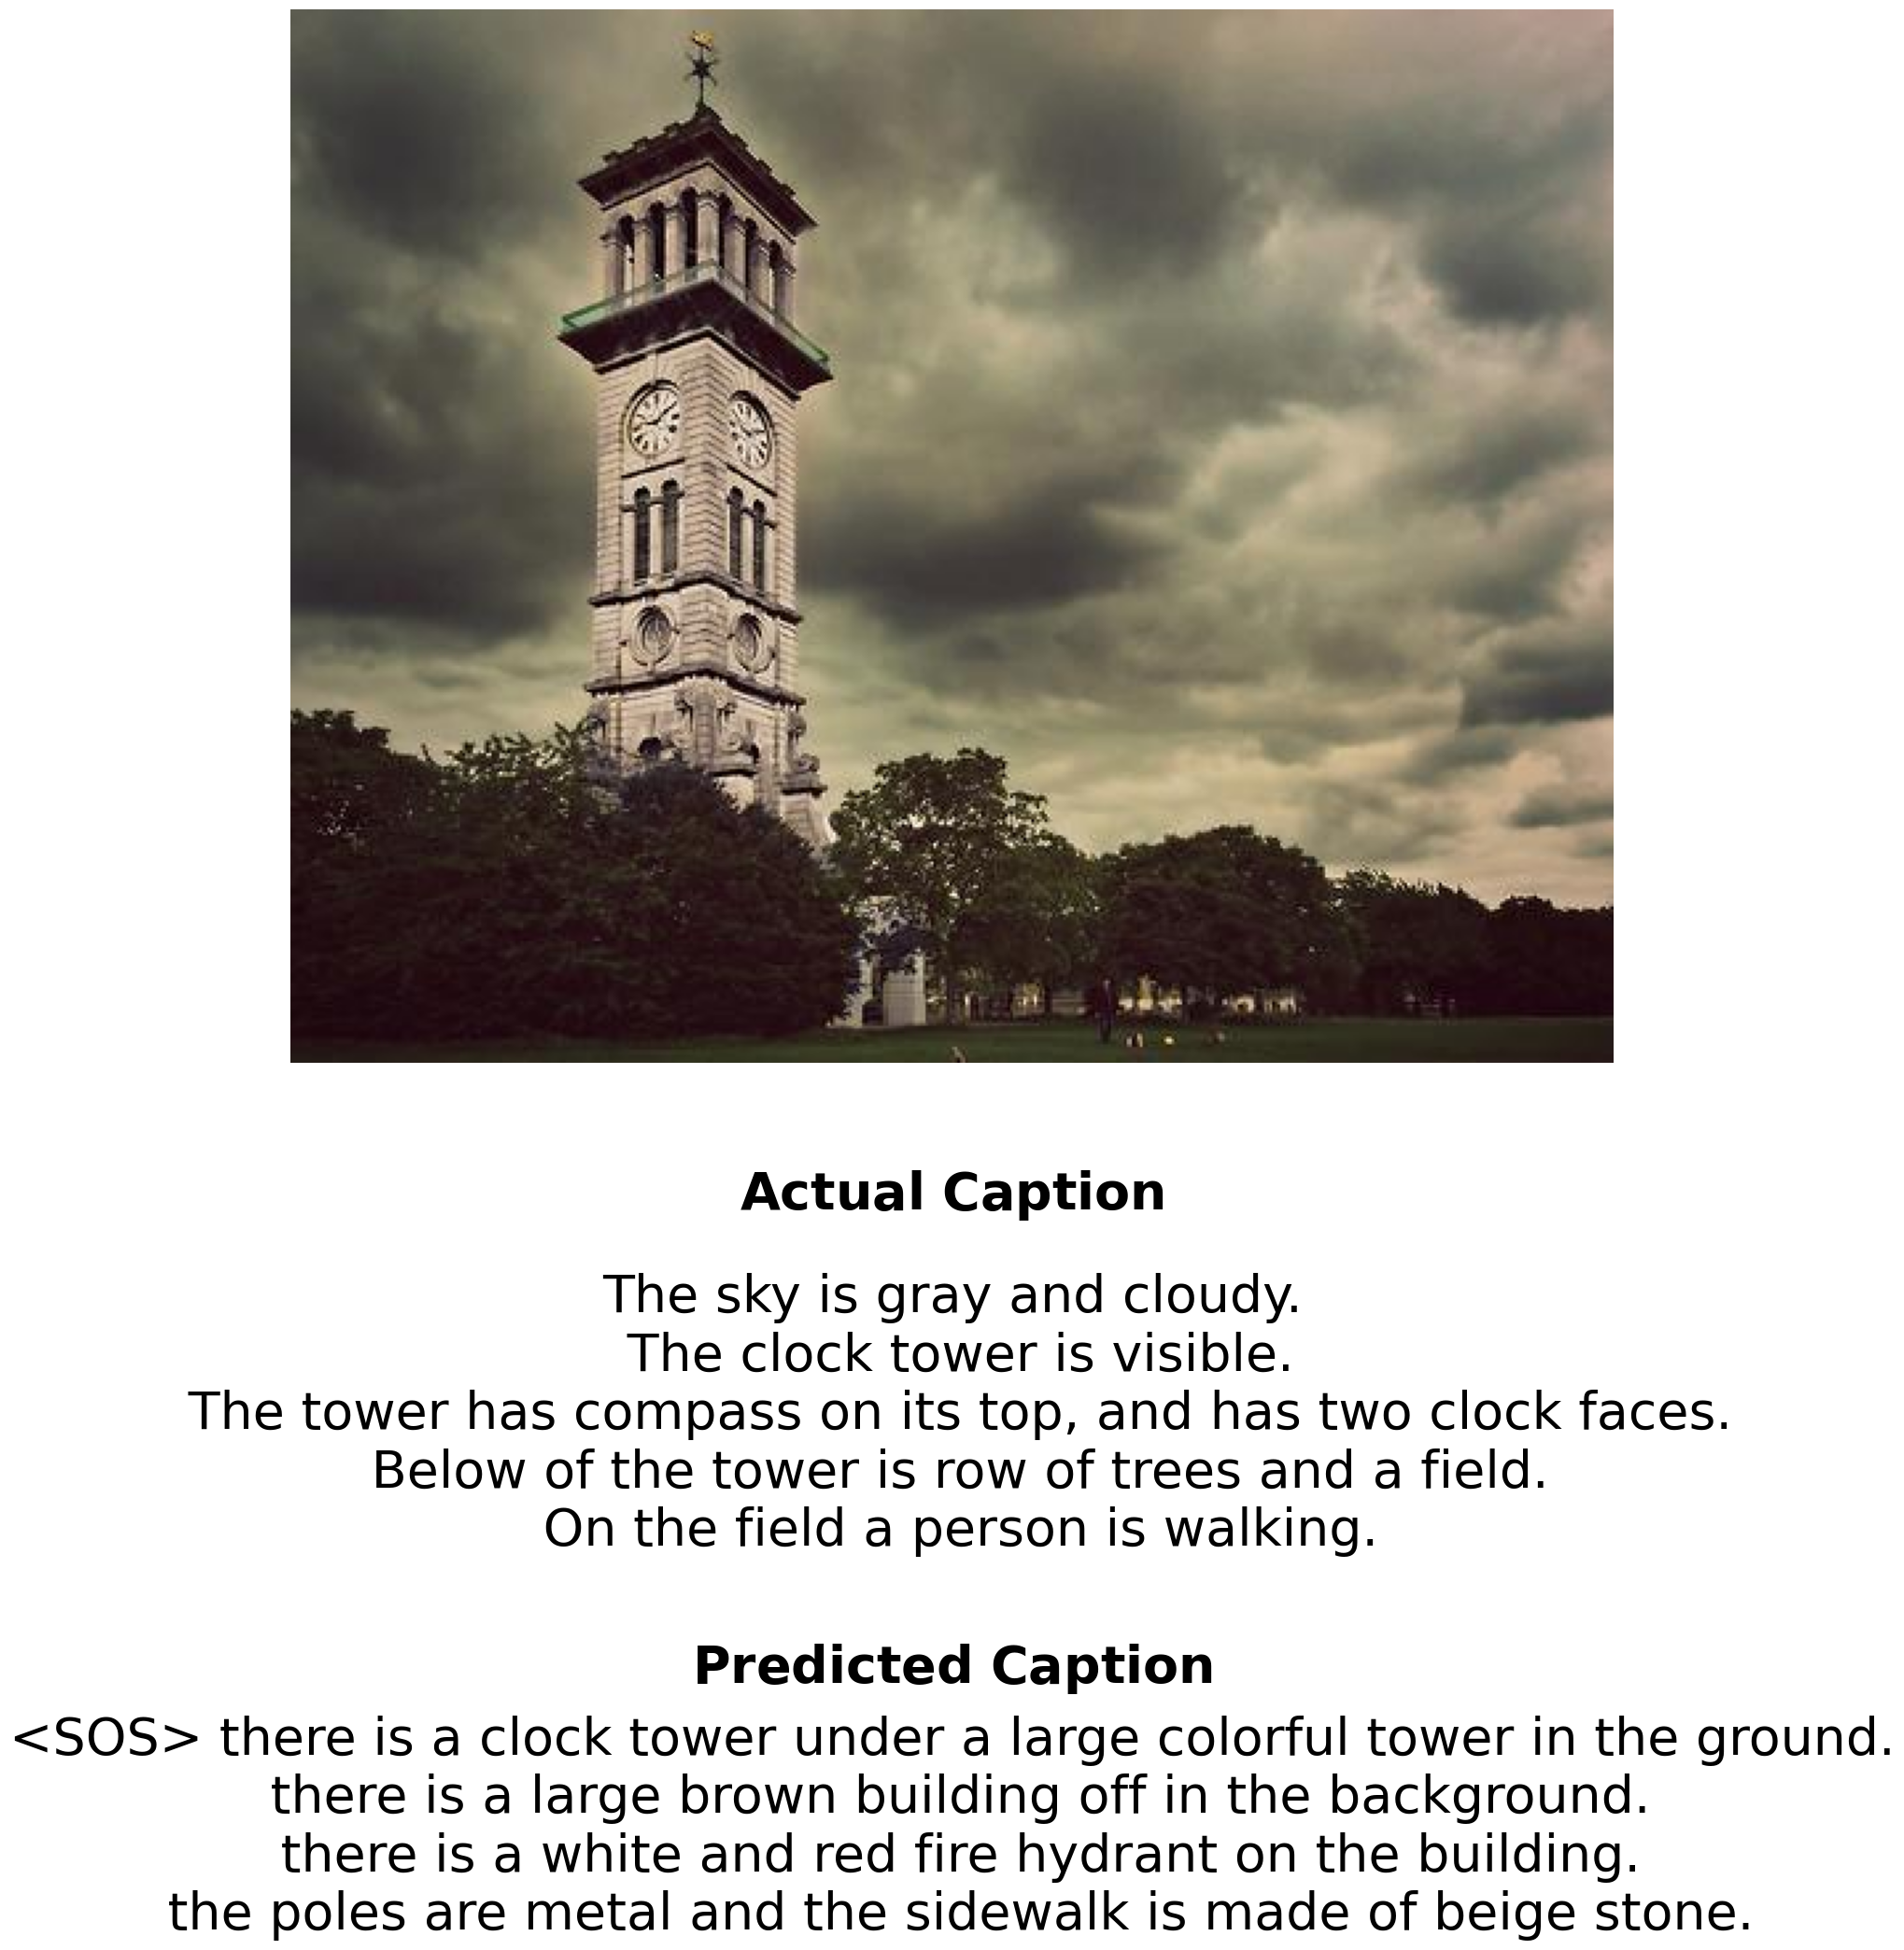

In [ ]:
# Display a random image and its caption with adjustable size
display_random_image(dataset, image_size=(25, 25), caption_size=40)

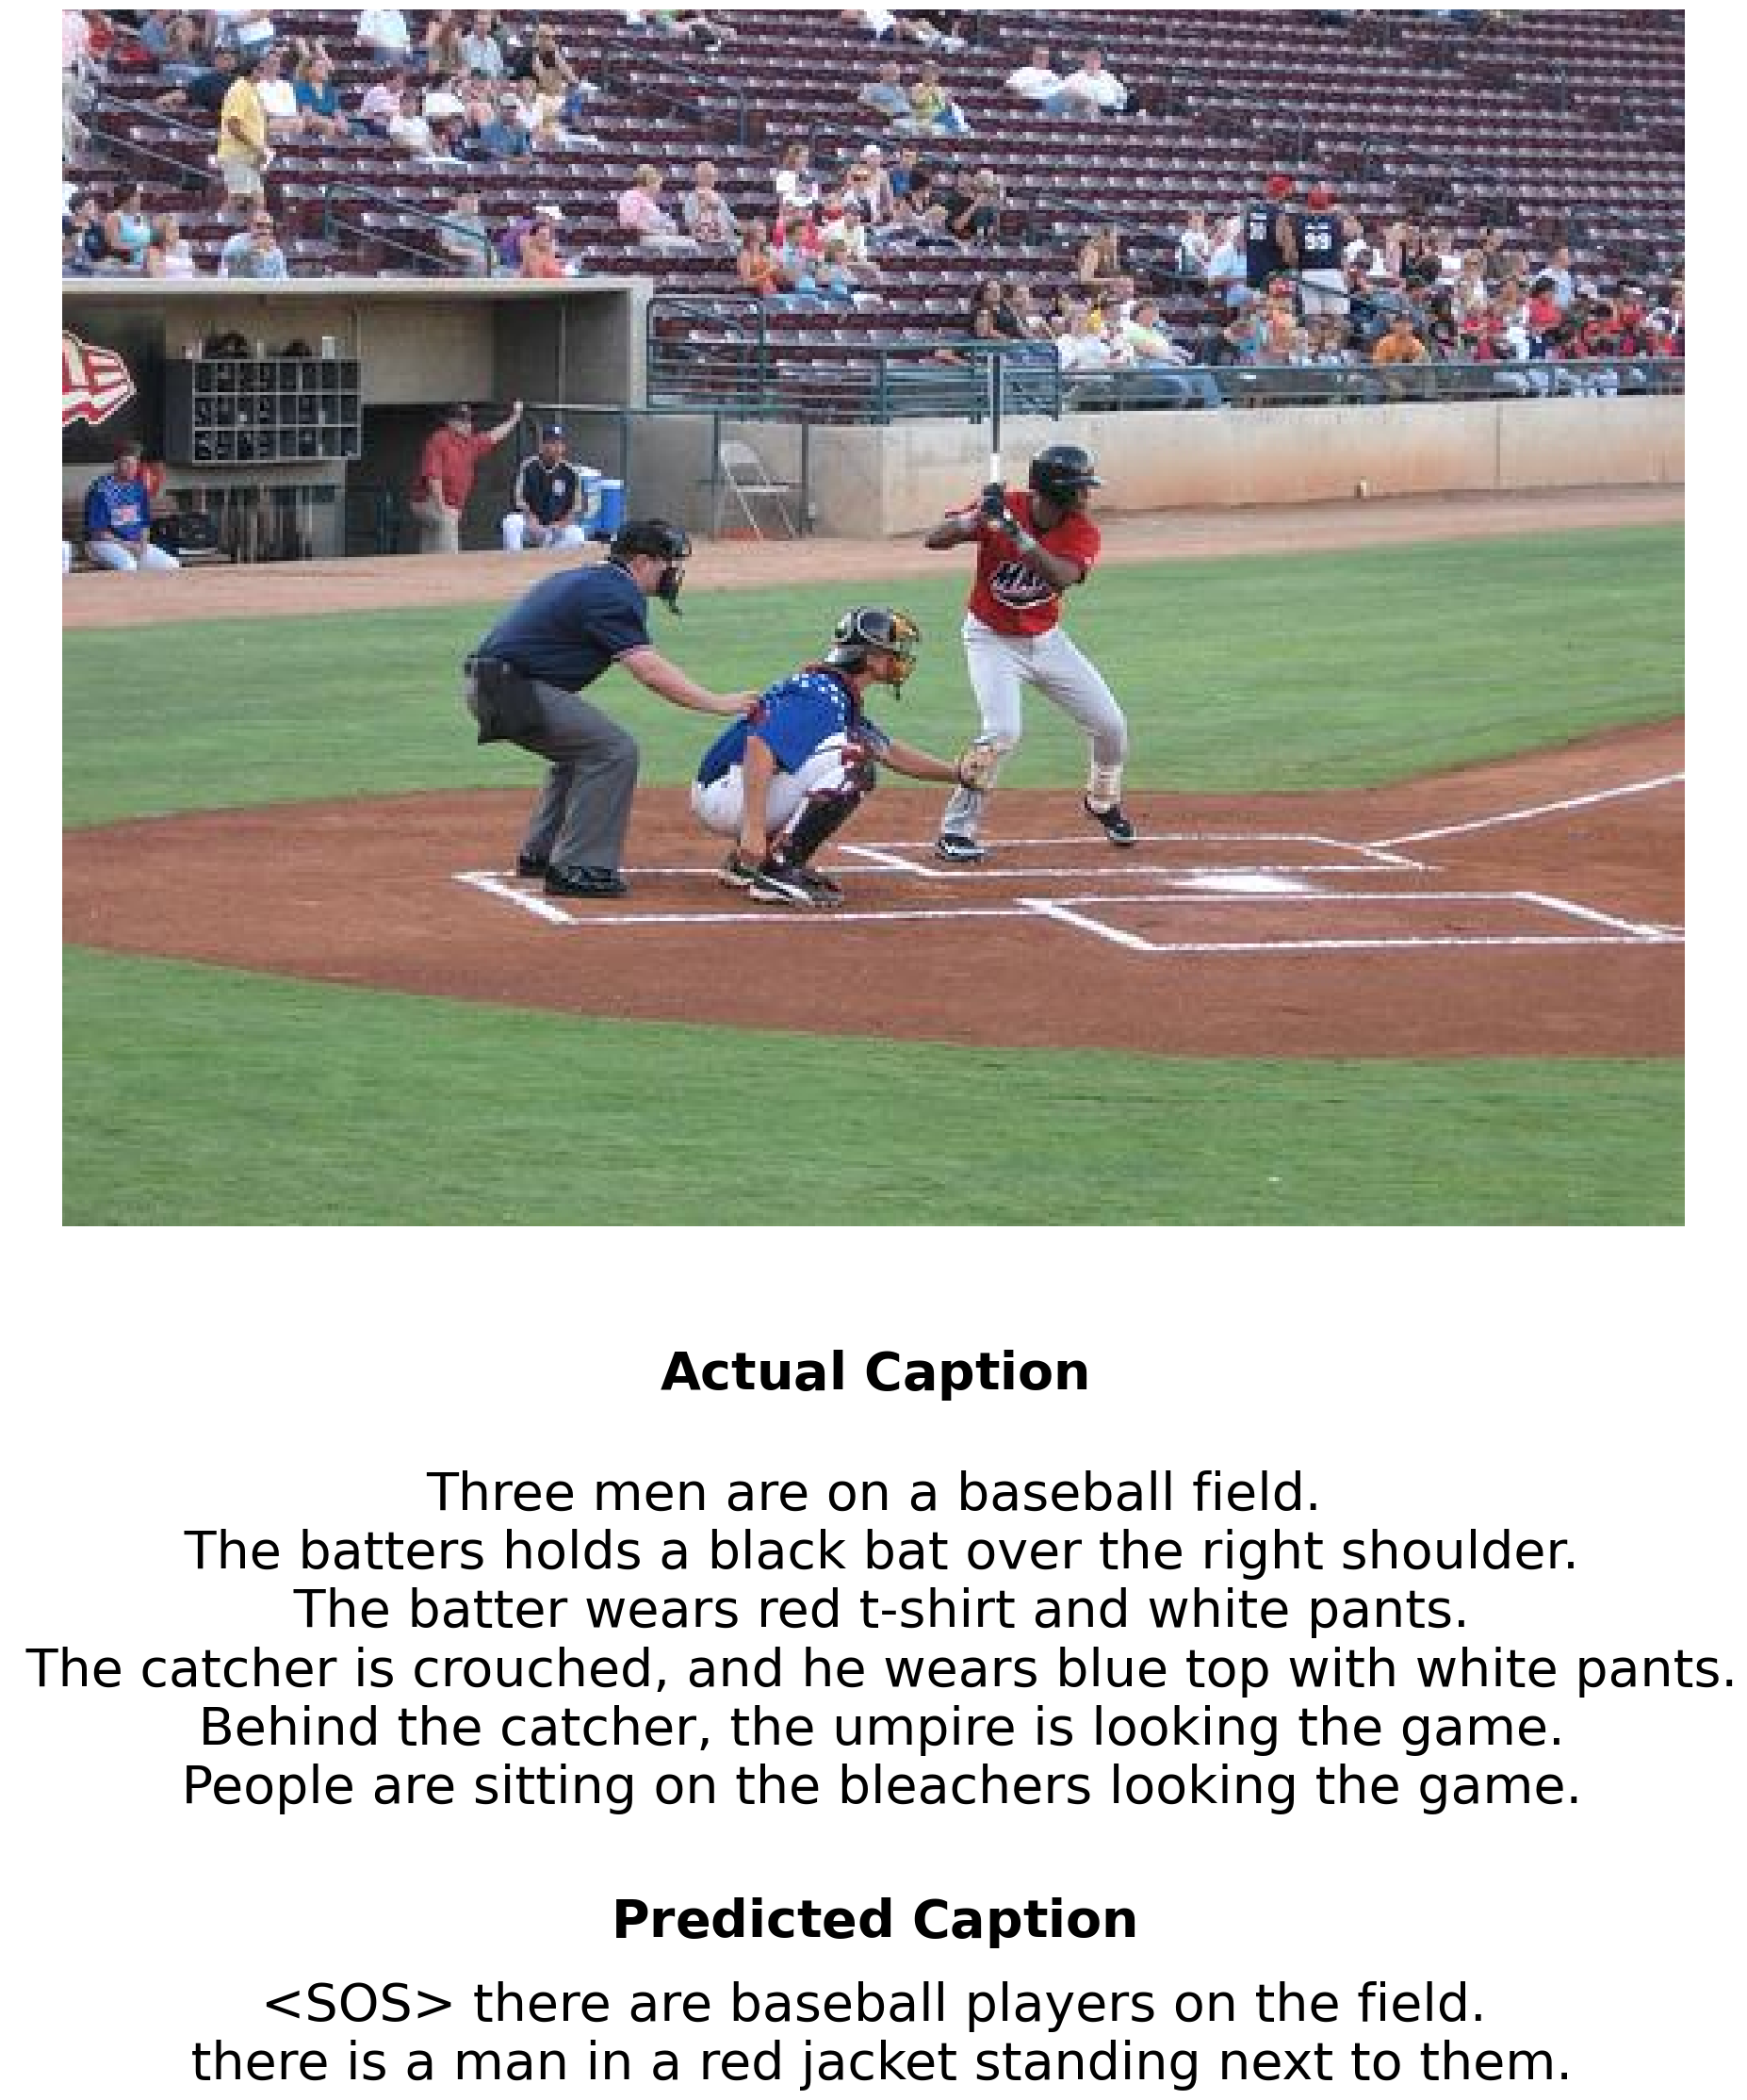

In [ ]:
# Display a random image and its caption with adjustable size
display_random_image(dataset, image_size=(25, 25), caption_size=40)

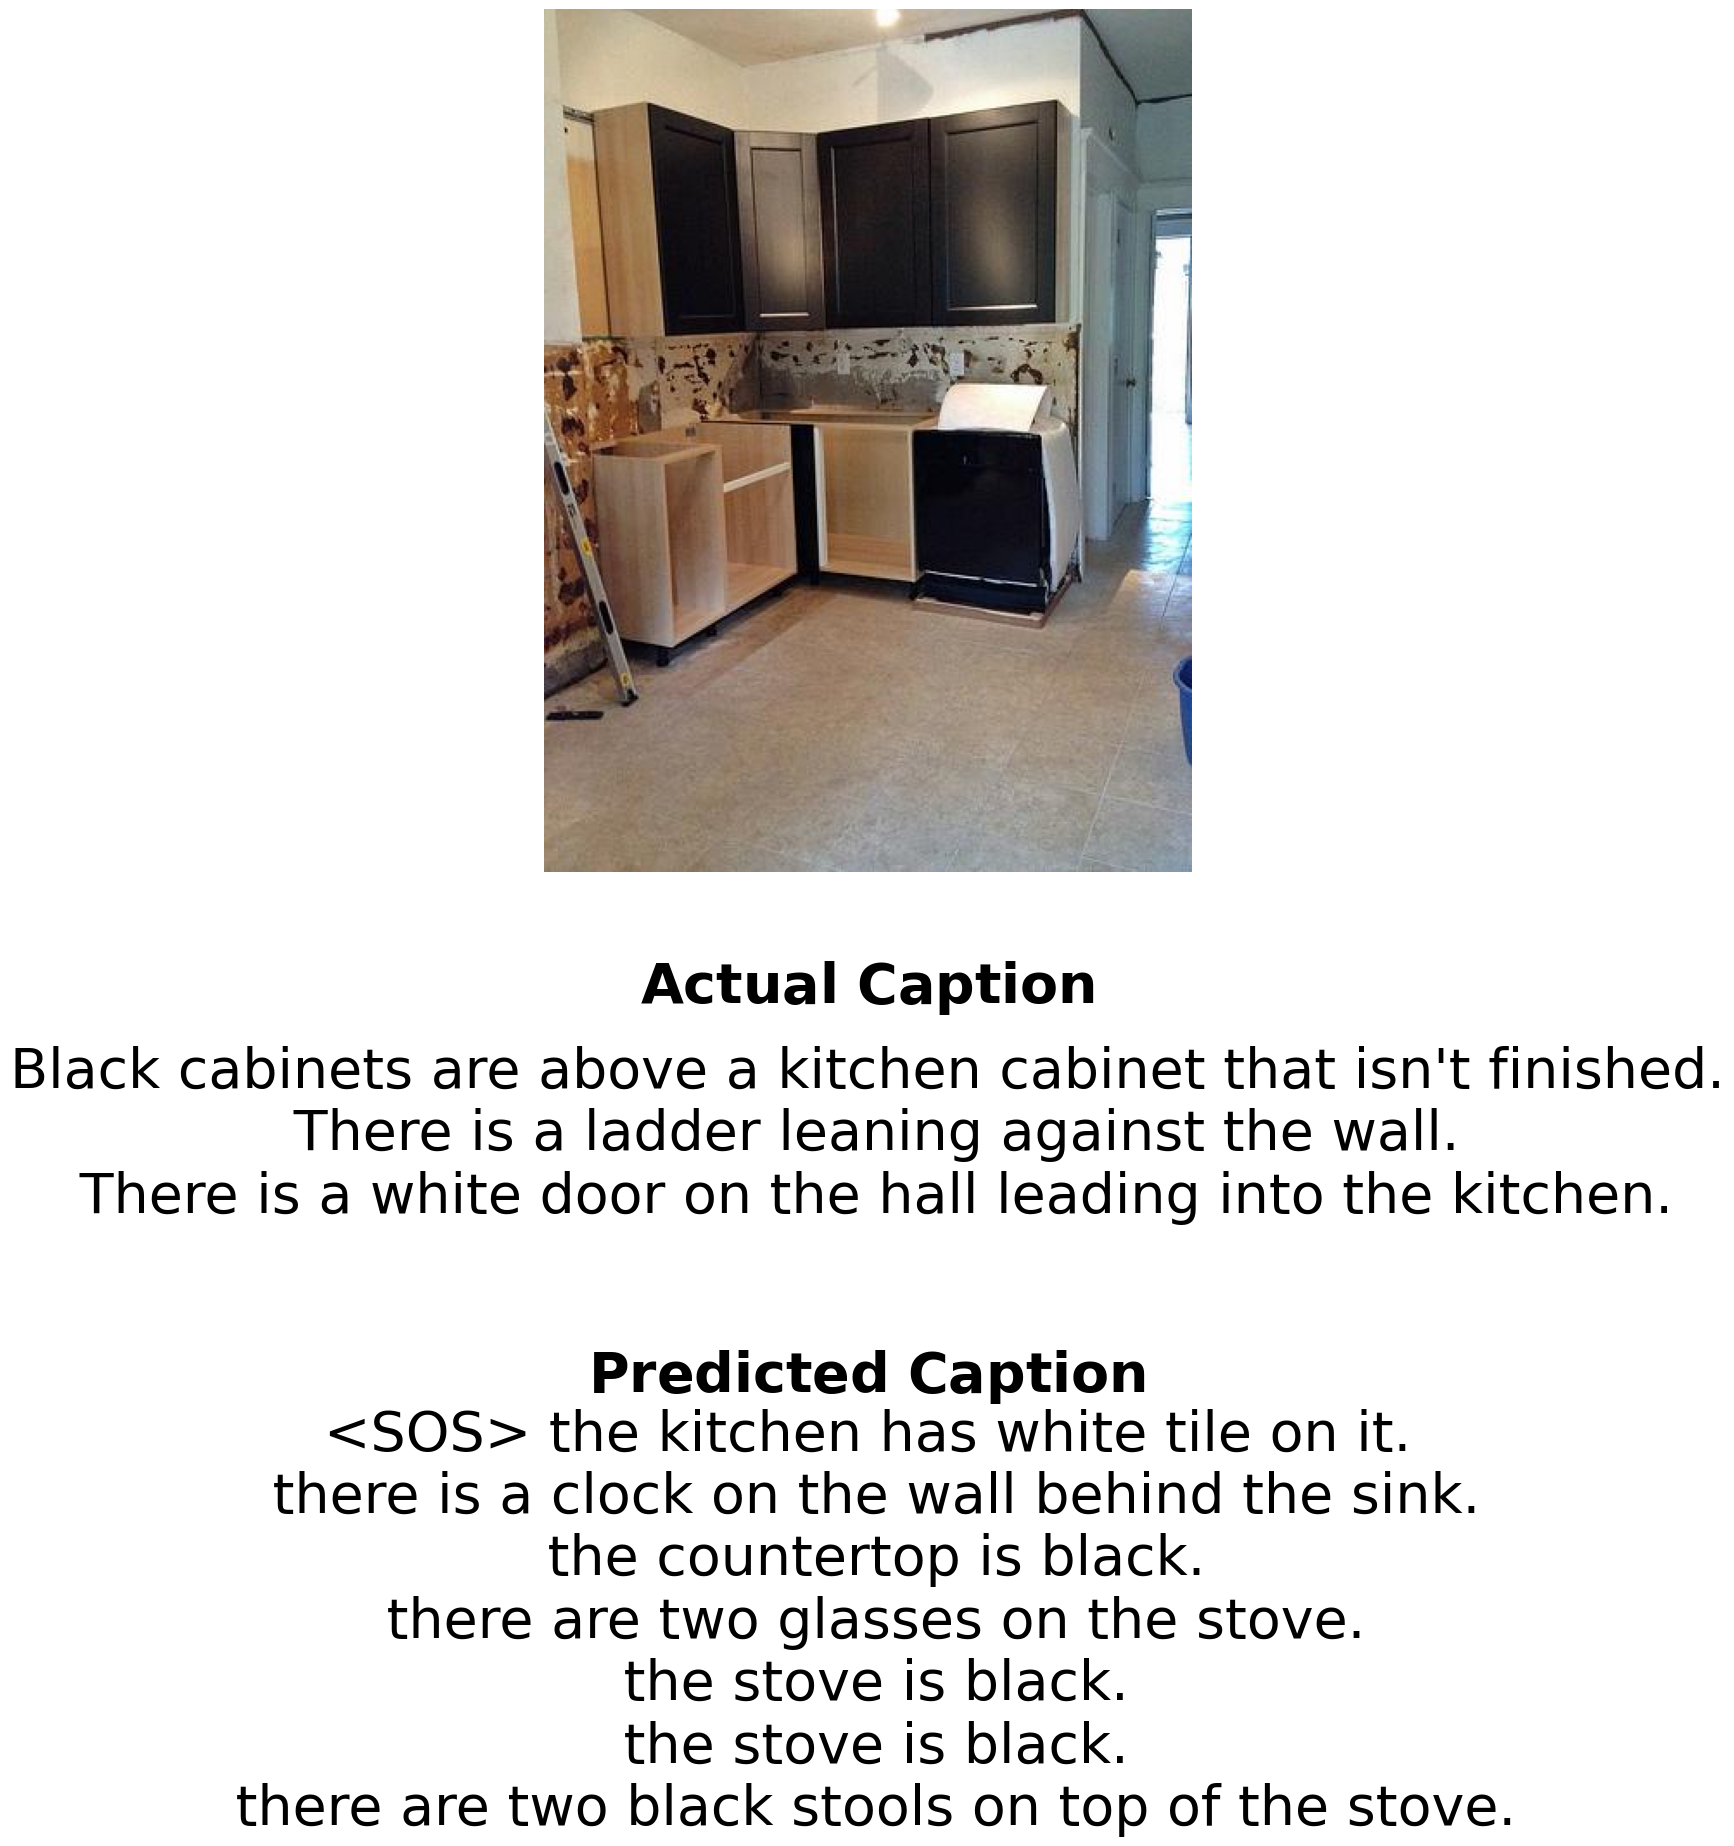

In [ ]:
# Display a random image and its caption with adjustable size
display_random_image(dataset, image_size=(25, 25), caption_size=40)

### **Caption Visualization Script for Comparing Actual and Predicted Captions**

This Python script utilizes pandas to read a CSV file containing actual and predicted captions, preprocesses the captions for display, and defines a function to randomly select and visualize an image alongside its corresponding caption. This tool is designed to aid in comparing actual and predicted captions in machine learning or image processing tasks.

In [6]:
import pandas as pd

df =  pd.read_csv("/var/Task_1_predictions.csv") # prediction.csv has actual and prediction columns where each entry has actual caption and its predicted caption

# df.head()

actual = df["actual"]

predictions = df["prediction"]

prepaired_pred =[]
prepaired_actual=[]
for pred in predictions:
  pred= pred.replace("\n","")
  prepaired_pred.append(pred)

for pred in actual:
  pred= pred.replace("\n","")
  prepaired_actual.append(pred)

In [9]:
import evaluate
from cidereval import cider

cider_scores = cider(predictions=prepaired_pred, references=prepaired_actual)
# Extract the average CIDEr score from the cider_scores dictionary-like object
cider_scorer = cider_scores['avg_score']


# Load the BLEU evaluation metric
bleu = evaluate.load("bleu")
rouge = evaluate.load('rouge')

# Compute the BLEU score
results_bleu = bleu.compute(predictions=prepaired_pred, references=prepaired_actual)

results_rouge = rouge.compute(predictions=prepaired_pred, references=prepaired_actual)

# Print the results
# Print the average CIDEr score
print("CIDEr score:", cider_scorer)
print("bleu Metrix  :",results_bleu)
print("Rouge Metrix  :",results_rouge)

CIDEr score: 0.000266248970964519
bleu Metrix  : {'bleu': 0.03093076044746315, 'precisions': [0.3694559312413849, 0.0790017353937691, 0.01849355463813295, 0.0051130016327232105], 'brevity_penalty': 0.7588687993662172, 'length_ratio': 0.7837442806304016, 'translation_length': 49332, 'reference_length': 62944}
Rouge Metrix  : {'rouge1': 0.34255810408890397, 'rouge2': 0.09128388401475987, 'rougeL': 0.23539122389435096, 'rougeLsum': 0.23534440850965957}


Here is a summary of the evaluation metrics for the generated captions:

- **CIDEr Score:** 0.000266248970964519
- **BLEU Metric:**
  - BLEU Score: 0.03093076044746315
  - Precisions: [0.3694559312413849, 0.0790017353937691, 0.01849355463813295, 0.0051130016327232105]
  - Brevity Penalty: 0.7588687993662172
  - Length Ratio: 0.7837442806304016
  - Translation Length: 49332
  - Reference Length: 62944
- **ROUGE Metric:**
  - ROUGE-1: 0.34255810408890397
  - ROUGE-2: 0.09128388401475987
  - ROUGE-L: 0.23539122389435096
  - ROUGE-Lsum: 0.23534440850965957

These metrics provide insights into the quality and similarity of the generated captions compared to the ground truth captions. The BLEU score measures the similarity based on n-gram overlap, while the ROUGE score evaluates the recall of n-gram overlap and longest common subsequence between generated and reference captions. The CIDEr score is another metric that considers consensus-based evaluation using weighted n-gram matches.